## ** 실습 과제2 <11주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project2.ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2021.11.08(월요일) ~ 2021.11.14(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -



### **1. 다음의 서울 자전거 공유 수요 데이터 세트 테이터를 사용하여 Rented Bike count를 반응변수(종속변수)로 하는 ``단순회귀분석(Simple Linear Regression)``과 ``다중회귀분석(Multiple Linear Regression)``을 실습자료의 ``예제1과 예제2 유사한 방식``으로 진행하시오.**

``* 단순회귀분석 50점, 다중회귀분석 50점``

**<서울 자전거 공유 수요 데이터 세트>**

  * Date : year-month-day
  * Rented Bike count - Count of bikes rented at each hour
  * Hour - Hour of he day
  * Temperature-Temperature in Celsius
  * Humidity - %
  * Windspeed - m/s
  * Visibility - 10m
  * Dew point temperature - Celsius
  * Solar radiation - MJ/m2
  * Rainfall - mm
  * Snowfall - cm
  * Seasons - Winter, Spring, Summer, Autumn
  * Holiday - Holiday/No holiday
  * Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
2. scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명
3. 적절한 반응변수와 설명변수의 섫정
4. Train / Test set 분리 후 회귀식 추정
5. 회귀분석 결과 해석
6. Feature selection(변수 선택)
7. Test set을 이용한 Predict(예측)
```



### **1-1. 단순회귀분석 (50점)**

* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명

```
Rented Bike count와 Seasons을 선택하여 계절별로 자전거 렌트한 수를 알기 위해 사용
```

* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

In [4]:
install.packages(c("tidyverse", "data.table"))
install.packages("ggplot2")

library(data.table)
library(tidyverse)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [5]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용
# https://drive.google.com/file/d/1Dj_m9kvDyuUUuR_rLhMJ3r95pwF9wRl5/view?usp=sharing

system("gdown --id 1Dj_m9kvDyuUUuR_rLhMJ3r95pwF9wRl5")
system("ls", TRUE)

DF <- fread("/content/SeoulBikeData.csv", encoding = "UTF-8")
DF %>% summary()


[1] "sample_data"       "SeoulBikeData.csv"

     Date           Rented Bike Count      Hour        Temperature    
 Length:8760        Min.   :   0.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 191.0    1st Qu.: 5.75   1st Qu.:  3.50  
 Mode  :character   Median : 504.5    Median :11.50   Median : 13.70  
                    Mean   : 704.6    Mean   :11.50   Mean   : 12.88  
                    3rd Qu.:1065.2    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    Humidity       Wind speed      Visibility   Dew point temperature
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 Solar Radiat

In [6]:
DF %>% as_tibble() %>% show()

# A tibble: 8,760 × 14
   Date     `Rented Bike Cou…  Hour Temperature Humidity `Wind speed` Visibility
   <chr>                <int> <int>       <dbl>    <int>        <dbl>      <int>
 1 01/12/2…               254     0        -5.2       37          2.2       2000
 2 01/12/2…               204     1        -5.5       38          0.8       2000
 3 01/12/2…               173     2        -6         39          1         2000
 4 01/12/2…               107     3        -6.2       40          0.9       2000
 5 01/12/2…                78     4        -6         36          2.3       2000
 6 01/12/2…               100     5        -6.4       37          1.5       2000
 7 01/12/2…               181     6        -6.6       35          1.3       2000
 8 01/12/2…               460     7        -7.4       38          0.9       2000
 9 01/12/2…               930     8        -7.6       37          1.1       2000
10 01/12/2…               490     9        -6.5       27          0.5       1928
# … w

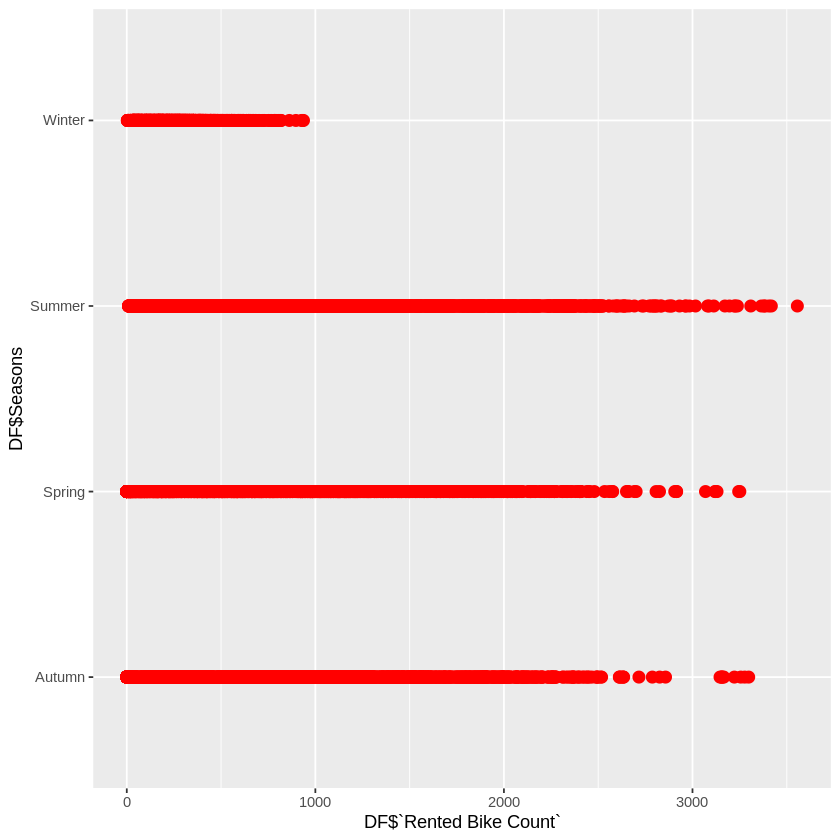

In [9]:
DF %>% ggplot(aes(x = DF$`Rented Bike Count`, y = DF$Seasons)) + geom_point(size = 3, color = "red")

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : Rented Bike count
설명변수 : Seosons
설정한 이유 : 계절별 자전거 수를 파악하기 위해 사용
```

* Train / Test set 분리 후 회귀식 추정

In [17]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [18]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
index <- caret::createDataPartition(y = DF$Seasons, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

            Date Rented Bike Count Hour Temperature Humidity Wind speed
   1: 01/12/2017               254    0        -5.2       37        2.2
   2: 01/12/2017               204    1        -5.5       38        0.8
   3: 01/12/2017                78    4        -6.0       36        2.3
   4: 01/12/2017               100    5        -6.4       37        1.5
   5: 01/12/2017               181    6        -6.6       35        1.3
  ---                                                                  
7882: 30/11/2018              1003   19         4.2       34        2.6
7883: 30/11/2018               764   20         3.4       37        2.3
7884: 30/11/2018               694   21         2.6       39        0.3
7885: 30/11/2018               712   22         2.1       41        1.0
7886: 30/11/2018               584   23         1.9       43        1.3
      Visibility Dew point temperature Solar Radiation Rainfall Snowfall
   1:       2000                 -17.6               0        0

* 회귀분석 결과 해석(이론 강의 참고)


In [21]:
# "summary", "plotRelWeights" 활용
install.packages("corrr")
library(corrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘seriation’, ‘ggrepel’




In [24]:
m1 <- lm(formula =  DF$`Rented Bike Count` ~ DF$Seasons, data = DF)
print("`Rented Bike Count` ~ Seasons")
summary(m1)

[1] "`Rented Bike Count` ~ Seasons"



Call:
lm(formula = DF$`Rented Bike Count` ~ DF$Seasons, data = DF)

Residuals:
     Min       1Q   Median       3Q      Max 
-1025.07  -393.20   -56.54   246.67  2521.93 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        819.60      12.27  66.806  < 2e-16 ***
DF$SeasonsSpring   -89.57      17.30  -5.176 2.31e-07 ***
DF$SeasonsSummer   214.48      17.30  12.395  < 2e-16 ***
DF$SeasonsWinter  -594.06      17.40 -34.145  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 573.3 on 8756 degrees of freedom
Multiple R-squared:  0.2101,	Adjusted R-squared:  0.2099 
F-statistic: 776.5 on 3 and 8756 DF,  p-value: < 2.2e-16


Rented Bike Count와 Seasons의 관계는 y절편을 819.6을 가지고,
각각의 기울기는 -89.57과 214.48 또 -594.06을 가진다.
Std.Error는 표준오차를 뜻하는 것이고, t value는 추정치를 표준오차로 나눈 값이다.

Multiple R-squared: 0.2101,를 뜻하는 것은 전체 데이터중 21%의 정확성을 가지고있다

* Feature selection(변수 선택)

In [26]:
# "lm", "update", "step" 활용
m1 <- lm(formula =  DF$`Rented Bike Count` ~ DF$Seasons, data = DF)

* Test set을 이용한 Predict(예측)

In [28]:
# "predict" 활용
install.packages("predict3d")
require(ggiraph)
require(ggiraphExtra)
require(plyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gdtools’, ‘lazyeval’, ‘insight’, ‘flextable’, ‘crosstalk’, ‘sjlabelled’, ‘sjmisc’, ‘ztable’, ‘rgl’, ‘ggiraphExtra’, ‘moonBook’


Warning message in install.packages("predict3d"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘flextable’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘ztable’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘moonBook’ had non-zero exit status”
Warning message in install.packages("predict3d"):
“installation of package ‘predict3d’ had non-zero exit status”
Loading required package: ggiraphExtra



In [31]:
ggPredict(m1,xpos=0.75,vjust=1.5, show.error = TRUE)

ERROR: ignored

### **1-2. 다중회귀분석 (50점)**

* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
```
Rented Bike Count와 Rainfall,Snowfall을 사용하여
강수량과 강우량의 대한 렌트 갯수를 알기위해 선택
```

* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

In [40]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용
install.packages(c("scatterplot3d","PerformanceAnalytics"))
library(scatterplot3d)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



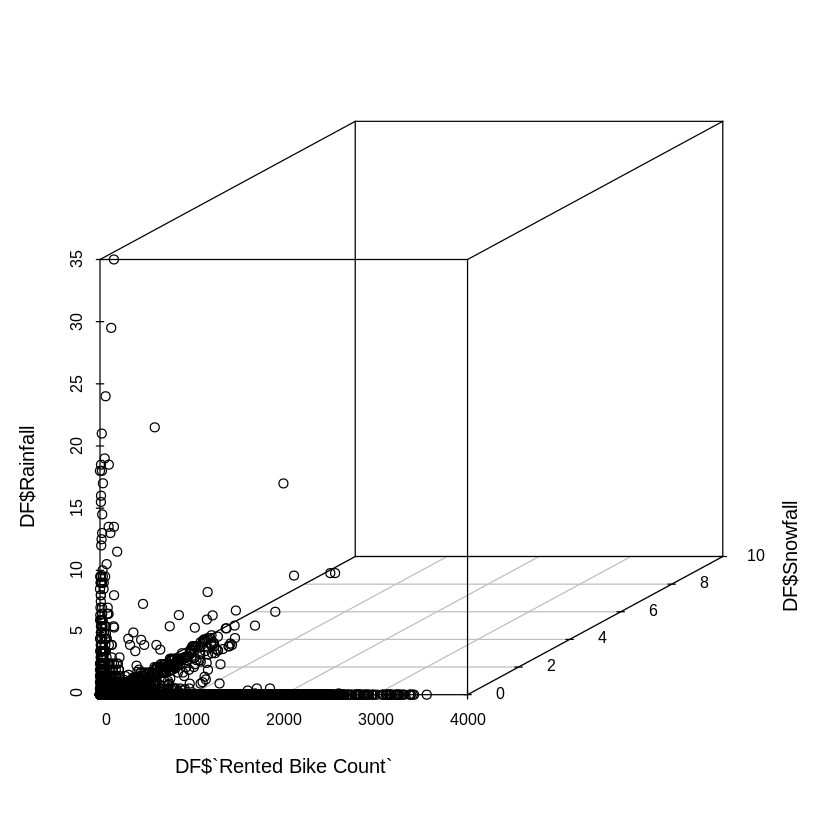

In [46]:
scatterplot3d(DF$`Rented Bike Count`, DF$Snowfall, DF$Rainfall,  angle = 40)

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : Rented Bike Count
설명변수 : Snowfall,Rainfall
설정한 이유 : 강우량과 강수량에 대한 렌트 갯수를 알기 위해 선택.
```

* Train / Test set 분리 후 회귀식 추정

In [55]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
index <- caret::createDataPartition(y = DF$Snowfall, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

            Date Rented Bike Count Hour Temperature Humidity Wind speed
   1: 01/12/2017               254    0        -5.2       37        2.2
   2: 01/12/2017               204    1        -5.5       38        0.8
   3: 01/12/2017               173    2        -6.0       39        1.0
   4: 01/12/2017               107    3        -6.2       40        0.9
   5: 01/12/2017                78    4        -6.0       36        2.3
  ---                                                                  
7880: 30/11/2018              1003   19         4.2       34        2.6
7881: 30/11/2018               764   20         3.4       37        2.3
7882: 30/11/2018               694   21         2.6       39        0.3
7883: 30/11/2018               712   22         2.1       41        1.0
7884: 30/11/2018               584   23         1.9       43        1.3
      Visibility Dew point temperature Solar Radiation Rainfall Snowfall
   1:       2000                 -17.6               0        0

* 회귀분석 결과 해석(이론 강의 참고)


In [52]:
# "summary", "plotRelWeights" 활용
model <- lm(`Rented Bike Count` ~ Snowfall + Rainfall, data = DF)
model
summary(model)


Call:
lm(formula = `Rented Bike Count` ~ Snowfall + Rainfall, data = DF)

Coefficients:
(Intercept)     Snowfall     Rainfall  
     730.57      -207.89       -69.68  



Call:
lm(formula = `Rented Bike Count` ~ Snowfall + Rainfall, data = DF)

Residuals:
   Min     1Q Median     3Q    Max 
-730.6 -500.9 -174.1  342.4 2825.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  730.568      6.926  105.48   <2e-16 ***
Snowfall    -207.889     15.504  -13.41   <2e-16 ***
Rainfall     -69.678      6.002  -11.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 633.7 on 8757 degrees of freedom
Multiple R-squared:  0.03496,	Adjusted R-squared:  0.03474 
F-statistic: 158.6 on 2 and 8757 DF,  p-value: < 2.2e-16


** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 

3. 밑 부분의 Adjusted R-squared 값은 0.03474로, 3%만큼의 설명력을 가진다고 판단할 수 있다.

* Feature selection(변수 선택)

In [53]:
# "lm", "update", "step" 활용
lm(`Rented Bike Count` ~ Snowfall + Rainfall, data = DF)


Call:
lm(formula = `Rented Bike Count` ~ Snowfall + Rainfall, data = DF)

Coefficients:
(Intercept)     Snowfall     Rainfall  
     730.57      -207.89       -69.68  


* Test set을 이용한 Predict(예측)

In [59]:
# "predict" 활용
set.seed(51)
Snowfall_r <- sample(min(DF$Snowfall):max(DF$Snowfall), 60, replace = F)
Rainfall_r <- sample(min(DF$Rainfall):max(DF$Rainfall), 60, replace = F)

new_data <- tibble(Snowfall = Snowfall_r, Rainfall = Rainfall_r)
new_data

`Rented Bike Count`_r <- predict(model_2, new_data)
new_data <- new_data %>% bind_cols(tibble(sales_predict = `Rented Bike Count`_r))
new_data %>% show()

ERROR: ignored